In [70]:
import requests
import os

In [204]:
title='Gossiping'
r = requests.get(f"https://www.ptt.cc/bbs/{title}/index.html")

import requests
payload = {
'from': '/bbs/Gossiping/index.html',
'yes': 'yes'
}
rs = requests.session()
res = rs.post('https://www.ptt.cc/ask/over18',data = payload)
res = rs.get('https://www.ptt.cc/bbs/Gossiping/index.html')

soup = BeautifulSoup(res.text,"html.parser")
u = soup.select("div.btn-group btn-group-paging")#上一頁按鈕的a標籤
u = soup.select("div.btn-group.btn-group-paging a")#上一頁按鈕的a標籤
u[1]['href']


In [227]:
u = soup.select("div.btn-group.btn-group-paging a")#上一頁按鈕的a標籤
index=u[1]['href'].split('/')[-1]
latest_index=int(index.split('.')[0].replace('index',''))
print (latest_index)


39008


In [228]:

from PttWebCrawler.crawler import *
file_path=os.path.abspath("")
c = PttWebCrawler(as_lib=True)

file_name=c.parse_articles(latest_index-50, latest_index, title,path=file_path)

08.A.1CA
Processing article: M.1617608841.A.EDA
Processing article: M.1617608953.A.F7F
Processing article: M.1617608959.A.478
Processing article: M.1617608959.A.AD0
Processing article: M.1617608966.A.693
Processing article: M.1617609024.A.58D
Processing article: M.1617609048.A.70A
Processing article: M.1617609062.A.740
Processing article: M.1617609070.A.634
Processing index: 38983
invalid url: https://www.ptt.cc/bbs/Gossiping/index38983.html
Processing index: 38984
Processing article: M.1617609849.A.A45
Processing article: M.1617609869.A.2C7
Processing article: M.1617609903.A.427
Processing article: M.1617609920.A.2DB
Processing article: M.1617609933.A.B21
Processing article: M.1617609946.A.304
Processing article: M.1617609955.A.443
Processing article: M.1617609968.A.A81
Processing article: M.1617609969.A.281
Processing article: M.1617610027.A.F6F
Processing article: M.1617610060.A.C04
Processing article: M.1617610094.A.1E0
Processing article: M.1617610157.A.1AD
Processing article: M.1

In [230]:
import os
# sys.path.append(f'{os.getcwd()}/my-nlp-wrangler')
file_name=f'{os.getcwd()}/{title}-{latest_index-50}-{latest_index}.json'

In [231]:
import json 
  
# Opening JSON file 
f = open(file_name) 
data = json.load(f) 

In [232]:
import pandas as pd  


In [233]:
article_df=pd.json_normalize(data['articles'])
article_df.head(10)

,article_id,article_title,author,board,content,date,ip,messages,url,message_count.all,message_count.boo,message_count.count,message_count.neutral,message_count.push
0,M.1617593789.A.1CE,Re: [問卦] 網紅捐150萬太有愛心了吧,samok (記者只會抄公社低卡記錄7),Gossiping,https://media.zenfs.com/zhtw/nownews.com/c1e13...,Mon Apr 5 11:36:25 2021,27.247.221.90,"[{'push_content': '777', 'push_ipdatetime': '0...",https://www.ptt.cc/bbs/Gossiping/M.1617593789....,343,6,288,43,294
1,M.1617593823.A.DDF,Re: [問卦] 恕我愚昧，台鐵事故為什麼要捐款,AMPHIBIA (amphibia),Gossiping,: 一般颱風地震淹水災害 : 各種損失要捐錢我懂 : 但是這種人為缺失 : 人受傷在醫院有健...,Mon Apr 5 11:37:01 2021,61.216.186.149,"[{'push_content': '有盤子，會捐錢', 'push_ipdatetime'...",https://www.ptt.cc/bbs/Gossiping/M.1617593823....,26,1,8,16,9
2,M.1617593892.A.5D2,[問卦] 中國會趁俄烏戰爭開啟台海戰爭嗎？,Cetuximab (單株),Gossiping,俄國跟烏克蘭可能會開打 被講成可能引爆世界大戰 那如果真的各國都進場參戰了 中國要去哪邊打醬...,Mon Apr 5 11:38:10 2021,36.226.244.41,"[{'push_content': '有民進黨在有什麼好怕的 護台抗中時刻到了', 'pus...",https://www.ptt.cc/bbs/Gossiping/M.1617593892....,39,1,16,21,17
3,M.1617593963.A.FB1,[問卦] 台灣人忘記這次台鐵事故要多久時間?,kairiyu (E N O U G H is enough),Gossiping,這次台鐵事故 是台灣近半世紀以來最嚴重的火車事故 儘管發生到現在已經第四天 但好像還沒看到任...,Mon Apr 5 11:39:19 2021,49.214.128.251,"[{'push_content': '樓下你最喜歡被連續肛多久', 'push_ipdate...",https://www.ptt.cc/bbs/Gossiping/M.1617593963....,9,2,-2,7,0
4,M.1617593968.A.2C1,[新聞] 2駕駛亡重創士氣 台鐵司機員恍神 到站開,jing1219 (Ice cream cake),Gossiping,1.媒體來源: 中時電子報 2.記者署名: 王嘉慶 3.完整新聞標題: 2駕駛亡重創士氣 台...,Mon Apr 5 11:39:25 2021,110.26.228.195,"[{'push_content': '....牽拖', 'push_ipdatetime':...",https://www.ptt.cc/bbs/Gossiping/M.1617593968....,49,25,-16,15,9
5,M.1617593982.A.7AC,"[問卦] 尚未確認的罹難者,無法驗出性別嗎？",musashi0839 (常山七次郎),Gossiping,目前台鐵的罹難者 根據新聞報導只剩下一名尚未確認身分 請問目前的檢驗技術 可以驗出罹難者的性...,Mon Apr 5 11:39:39 2021,112.78.70.36,"[{'push_content': '驗DNA吧', 'push_ipdatetime': ...",https://www.ptt.cc/bbs/Gossiping/M.1617593982....,13,0,8,5,8
6,M.1617593992.A.9BE,Re: [問卦] 李義祥怎麼態度變這麼多？,dean1990 (狄恩院長),Gossiping,當下應該是嚇到無感了，沉澱一段時間才情緒崩潰。親人過世時也是如此。,Mon Apr 5 11:39:50 2021,111.71.218.0,"[{'push_content': '', 'push_ipdatetime': '04/0...",https://www.ptt.cc/bbs/Gossiping/M.1617593992....,8,1,4,2,5
7,M.1617594049.A.A1E,[問卦] 講話加鼠有比較可愛嗎,h57124342000 (揪咪),Gossiping,安安 肥宅我每天在群組裡朋友女友間網路論壇 都要看到一堆講話加鼠的 笑鼠 累鼠 氣鼠 開心鼠...,Mon Apr 5 11:40:45 2021,106.1.232.160,"[{'push_content': '看臉', 'push_ipdatetime': '04...",https://www.ptt.cc/bbs/Gossiping/M.1617594049....,25,7,3,8,10
8,M.1617594177.A.794,Re: [問卦] 日向坂是不是出現了路線危機?,FW190 (),Gossiping,: 那為什麼會流失那麼多粉絲呢? : 是不是代表綜藝無法吸粉呢? 部分恕刪 針對日向綜藝能否...,Mon Apr 5 11:42:55 2021,111.254.37.239,"[{'push_content': '日向會現在都特別在標題標註朝王道偶像番組邁進', 'p...",https://www.ptt.cc/bbs/Gossiping/M.1617594177....,14,1,6,6,7
9,M.1617594213.A.05E,[問卦] 為什麼搭捷運時的台灣人不一樣？,todao (心裡有數),Gossiping,到底是為啥？ 搭台鐵搭公車是一個樣子 路上開車比狠的 搭捷運又變成很有禮貌 連手扶梯都自動讓...,Mon Apr 5 11:43:31 2021,1.200.7.84,"[{'push_content': '只有你這樣', 'push_ipdatetime': ...",https://www.ptt.cc/bbs/Gossiping/M.1617594213....,16,3,6,4,9


## Clean Data

In [234]:
from mynlpwrangler.cleaner import ArticleCleaner
from mynlpwrangler.tokenizer import Tokenizer
import os

In [235]:
col='content'
next_col=f'{col}_new'
tokenized_column='tokenize_word'
ac=ArticleCleaner(col='content',cleaned_col='clean_sentence')
clean_data=ac.clean_data(setence_df=article_df)

In [236]:
clean_data.columns

Index(['article_id', 'article_title', 'author', 'board', 'content', 'date',
       'ip', 'messages', 'url', 'message_count.all', 'message_count.boo',
       'message_count.count', 'message_count.neutral', 'message_count.push',
       'clean_sentence'],
      dtype='object')

In [237]:
clean_data.head(2)

,article_id,article_title,author,board,content,date,ip,messages,url,message_count.all,message_count.boo,message_count.count,message_count.neutral,message_count.push,clean_sentence
0,M.1617593789.A.1CE,Re: [問卦] 網紅捐150萬太有愛心了吧,samok (記者只會抄公社低卡記錄7),Gossiping,https://media.zenfs.com/zhtw/nownews.com/c1e13...,Mon Apr 5 11:36:25 2021,27.247.221.90,"[{'push_content': '777', 'push_ipdatetime': '0...",https://www.ptt.cc/bbs/Gossiping/M.1617593789....,343,6,288,43,294,左下二 右上四 覺得好眼熟喔 捐血活動是不是也用番茄醬代替勒 看到承億文旅就更眼熟了 據了解...
1,M.1617593823.A.DDF,Re: [問卦] 恕我愚昧，台鐵事故為什麼要捐款,AMPHIBIA (amphibia),Gossiping,: 一般颱風地震淹水災害 : 各種損失要捐錢我懂 : 但是這種人為缺失 : 人受傷在醫院有健...,Mon Apr 5 11:37:01 2021,61.216.186.149,"[{'push_content': '有盤子，會捐錢', 'push_ipdatetime'...",https://www.ptt.cc/bbs/Gossiping/M.1617593823....,26,1,8,16,9,一般颱風地震淹水災害 各種損失要捐錢我懂 但是這種人為缺失 人受傷在醫院有健...


In [238]:
tk=Tokenizer(stop_word_path=f'{os.getcwd()}/stop_word.txt')
tk.tokenize_dataframe(clean_data,sentences_column='content',new_generate_column=tokenized_column)

,article_id,article_title,author,board,content,date,ip,messages,url,message_count.all,message_count.boo,message_count.count,message_count.neutral,message_count.push,clean_sentence,tokenize_word
0,M.1617593789.A.1CE,Re: [問卦] 網紅捐150萬太有愛心了吧,samok (記者只會抄公社低卡記錄7),Gossiping,https://media.zenfs.com/zhtw/nownews.com/c1e13...,Mon Apr 5 11:36:25 2021,27.247.221.90,"[{'push_content': '777', 'push_ipdatetime': '0...",https://www.ptt.cc/bbs/Gossiping/M.1617593789....,343,6,288,43,294,左下二 右上四 覺得好眼熟喔 捐血活動是不是也用番茄醬代替勒 看到承億文旅就更眼熟了 據了解...,media zenfs zhtw nownews c1e13af3be512dae8578f...
1,M.1617593823.A.DDF,Re: [問卦] 恕我愚昧，台鐵事故為什麼要捐款,AMPHIBIA (amphibia),Gossiping,: 一般颱風地震淹水災害 : 各種損失要捐錢我懂 : 但是這種人為缺失 : 人受傷在醫院有健...,Mon Apr 5 11:37:01 2021,61.216.186.149,"[{'push_content': '有盤子，會捐錢', 'push_ipdatetime'...",https://www.ptt.cc/bbs/Gossiping/M.1617593823....,26,1,8,16,9,一般颱風地震淹水災害 各種損失要捐錢我懂 但是這種人為缺失 人受傷在醫院有健...,地震 淹水 災害 損失 這種 缺失 受傷 醫院 健保 事後索 人命 保險理 災民 急需 物資...
2,M.1617593892.A.5D2,[問卦] 中國會趁俄烏戰爭開啟台海戰爭嗎？,Cetuximab (單株),Gossiping,俄國跟烏克蘭可能會開打 被講成可能引爆世界大戰 那如果真的各國都進場參戰了 中國要去哪邊打醬...,Mon Apr 5 11:38:10 2021,36.226.244.41,"[{'push_content': '有民進黨在有什麼好怕的 護台抗中時刻到了', 'pus...",https://www.ptt.cc/bbs/Gossiping/M.1617593892....,39,1,16,21,17,俄國跟烏克蘭可能會開打 被講成可能引爆世界大戰 那如果真的各國都進場參戰了 中國要去哪邊打醬...,俄國 烏克蘭 可能 會開 講成 可能 引爆 世界 大戰 真的 各國 進場 參戰 中國要 打醬...
3,M.1617593963.A.FB1,[問卦] 台灣人忘記這次台鐵事故要多久時間?,kairiyu (E N O U G H is enough),Gossiping,這次台鐵事故 是台灣近半世紀以來最嚴重的火車事故 儘管發生到現在已經第四天 但好像還沒看到任...,Mon Apr 5 11:39:19 2021,49.214.128.251,"[{'push_content': '樓下你最喜歡被連續肛多久', 'push_ipdate...",https://www.ptt.cc/bbs/Gossiping/M.1617593963....,9,2,-2,7,0,這次台鐵事故 是台灣近半世紀以來最嚴重的火車事故 儘管發生到現在已經第四天 但好像還沒看到任...,台鐵 事故 台灣近 半世 紀以 嚴重 火車 事故 第四天 好像 還沒 看到 一個 單位 官員...
4,M.1617593968.A.2C1,[新聞] 2駕駛亡重創士氣 台鐵司機員恍神 到站開,jing1219 (Ice cream cake),Gossiping,1.媒體來源: 中時電子報 2.記者署名: 王嘉慶 3.完整新聞標題: 2駕駛亡重創士氣 台...,Mon Apr 5 11:39:25 2021,110.26.228.195,"[{'push_content': '....牽拖', 'push_ipdatetime':...",https://www.ptt.cc/bbs/Gossiping/M.1617593968....,49,25,-16,15,9,媒體來源 中時電子報 記者署名 王嘉慶 完整新聞標題 駕駛亡重創士氣 台鐵司機...,媒體 來源 中時 電子 記者 署名 王嘉慶 完整 新聞 標題 駕駛亡重 創士氣 台鐵司 機員...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,M.1617626645.A.917,[問卦] 鬼影追追追,GrimmNotes (格林童話),Gossiping,小時候最喜歡和親戚在深夜看鬼影追追追 每次都又怕又想看 然後晚上睡不著叫 不敢一人去尿尿 有...,Mon Apr 5 20:44:03 2021,122.116.59.31,"[{'push_content': 'XX一大堆', 'push_ipdatetime': ...",https://www.ptt.cc/bbs/Gossiping/M.1617626645....,11,0,5,6,5,小時候最喜歡和親戚在深夜看鬼影追追追 每次都又怕又想看 然後晚上睡不著叫 不敢一人去尿尿 有...,小時候 喜歡 親戚 深夜 鬼影 每次 晚上 睡不著 不敢 一人 鬼影 八卦
965,M.1617626745.A.D78,[問卦] 輪檔案如何備戰法盲指控,JasperChang (PeterChou),Gossiping,輪檔案的判決結果已經可以預期了 到時候法律大佬一定會訕笑吾等法盲 畢竟公正的司法就現有法令及...,Mon Apr 5 20:45:43 2021,118.160.123.93,"[{'push_content': '太早', 'push_ipdatetime': '04...",https://www.ptt.cc/bbs/Gossiping/M.1617626745....,2,2,-2,0,0,輪檔案的判決結果已經可以預期了 到時候法律大佬一定會訕笑吾等法盲 畢竟公正的司法就現有法令及...,輪檔案 判決 已經 預期 法律 大佬 一定 法盲 畢竟 公正 司法 現有 法令 調查 給予 ...
966,M.1617626796.A.028,[問卦] 鄉民是不是沒資格笑政大阿語女,Howard1420 (咎人),Gossiping,前幾天政大阿語女的事件 讓鄉民狠狠酸了一波 一口咬定人家偷拍沒查證 真的很可惡 但是今天好像...,Mon Apr 5 20:46:34 2021,101.14.244.133,"[{'push_content': '五樓脫褲開肛道歉', 'push_ipdatetime...",https://www.ptt.cc/bbs/Gossiping/M.1617626796....,10,3,2,2,5,前幾天政大阿語女的事件 讓鄉民狠狠酸了一波 一口咬定人家偷拍沒查證 真的很可惡 但是今天好像...,幾天政大 阿語 事件 鄉民 狠狠 一波 一口咬定 偷拍 沒查證 真的 可惡 今天 好像 滿多...
967,M.1617626798.A.BD9,Re: [新聞] 捐款破6000萬！陳時中承諾「公開透明,erichang (哲),Gossiping,台鐵死傷慘重 我還以為部長或官員大人會來承諾改革台鐵安全 允諾檢討報告公開透明 每一項缺失改...,Mon Apr 5 20:46:36 2021,106.1.234.91,"[{'push_content': '朕聽到了', 'push_ipdatetime': '...",https://www.ptt.cc/bbs/Gossiping/M.1617626798....,17,0,7,10,7,台鐵死傷慘重 我還以為部長或官員大人會來承諾改革台鐵安全 允諾檢討報告公開透明 每一項缺失改...,台鐵死傷 慘重 還以 部長 官員 大人 會來 承諾 改革 台鐵 安全 允諾 檢討 報告 公開...


In [239]:
clean_result=clean_data

## Count word

In [240]:
import numpy as np
def count_word_in_content(token_series):
    word_vector={}
    for index,text in enumerate(token_series.to_list()):
        word_list=text.split(' ')
        for word in word_list:
            if word not in word_vector:
                word_vector[word]={}
                word_vector[word][index]=1
            elif index not in word_vector[word]:
                word_vector[word][index]=1
            else:
                word_vector[word][index]+=1
    word_vector_list=[]
    for word,key in word_vector.items():
        for index,number in key.items():
            word_vector_list.append([word,index,number])
    word_vector_df=pd.DataFrame(data=word_vector_list,columns=['word','index','number'])
    return word_vector_df

In [241]:
word_vector_df=count_word_in_content(clean_result[tokenized_column])
word_vector_df.head(5)

,word,index,number
0,media,0,1
1,media,144,1
2,media,424,1
3,zenfs,0,1
4,zenfs,144,1


In [242]:
content_count_term=word_vector_df.groupby('word').count()['index'].reset_index()
content_count_term=content_count_term.rename(columns={'index':'content_count_term'})

In [243]:
word_vector_df=pd.merge(word_vector_df,content_count_term,on='word',how='left')
word_vector_df.head(5)

,word,index,number,content_count_term
0,media,0,1,3
1,media,144,1,3
2,media,424,1,3
3,zenfs,0,1,2
4,zenfs,144,1,2


In [244]:
word_vector_df['tf']=word_vector_df['number']
ttl_info=len(pd.unique(word_vector_df['index']))
word_vector_df['idf']=np.log(ttl_info/word_vector_df['content_count_term'])+1

In [245]:
word_vector_df['tfidf_manual']=word_vector_df['tf']*word_vector_df['idf']

In [246]:
word_vector_df[word_vector_df['index']==0].head()

,word,index,number,content_count_term,tf,idf,tfidf_manual
0,media,0,1,3,1,6.777652,6.777652
3,zenfs,0,1,2,1,7.183117,7.183117
5,zhtw,0,1,2,1,7.183117,7.183117
7,nownews,0,1,2,1,7.183117,7.183117
9,c1e13af3be512dae8578f371a2c53d9b,0,1,2,1,7.183117,7.183117


## Checkout Count

In [247]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from scipy.sparse import coo_matrix

In [248]:
cv = CountVectorizer()
word_matrix = cv.fit_transform(clean_result[tokenized_column].tolist())


In [249]:
text_dict=dict()
feature_name=cv.get_feature_names()
feature_name_df=pd.DataFrame(data=enumerate(feature_name),columns=['col_index','word'])

In [250]:
tmp=coo_matrix(word_matrix)
tf_df=pd.DataFrame({'index': tmp.row, 'col_index': tmp.col, '_tf': tmp.data} )[['index', 'col_index', '_tf']]
td_df=pd.merge(tf_df,feature_name_df,on='col_index',how='left')

In [251]:
compare_tf=pd.merge(word_vector_df,td_df,on=['index','word'],how='outer')
compare_tf[compare_tf['_tf']!=compare_tf['tf']].index.size

529

## Checkout idf

In [252]:
tfidf_transformer = TfidfVectorizer(norm=None, smooth_idf=False )
tfidf_matrix=tfidf_transformer.fit_transform(clean_result[tokenized_column].to_list())

In [253]:
idf_dict=pd.DataFrame(zip(tfidf_transformer.get_feature_names(),tfidf_transformer.idf_),columns=['word','_idf'])
idf_dict.head(10)

,word,_idf
0,00,5.796823
1,00000000000000072164,7.876265
2,00000000000001137979,7.876265
3,0001,7.876265
4,00056,7.876265
5,003,7.876265
6,003l1ay,7.876265
7,00709118680,6.777652
8,01,5.930354
9,01p,7.183117


In [254]:
## checkcout 
##的值是否一樣 :不一樣的會吐出來
idf_dict
check_idf=pd.merge(word_vector_df,idf_dict,on='word',how='left')
check_idf[check_idf['idf']!=check_idf['_idf']].index.size

846

## 使用tfidf

In [255]:
from sklearn.feature_extraction.text import TfidfTransformer
clean_result_df=clean_result[~clean_result[tokenized_column].isnull()]
def textFeatureExtraction(token_data):
    cv = CountVectorizer()
    # 將文字中的詞語轉換為詞頻矩陣，矩陣元素a[i][j] 表示j詞在i類文字下的詞頻
    word_matrix = cv.fit_transform(token_data)
    vocab = pd.DataFrame(cv.get_feature_names(), columns=['word'])
    vocab['col_index'] = vocab.index
    # 統計每一個詞語的tf-idf權值
    tfidf_transformer = TfidfTransformer(norm=None, smooth_idf=False,use_idf=True)
    tfidf_matrix = tfidf_transformer.fit_transform(word_matrix)
    return word_matrix, tfidf_matrix, vocab
word_matrix, tfidf_matrix, vocab = textFeatureExtraction( clean_result_df[tokenized_column])

In [256]:
tmp = coo_matrix(tfidf_matrix)
result= pd.DataFrame({'index': tmp.row, 'col_index': tmp.col, 'tfidf': tmp.data} )[['index', 'col_index', 'tfidf']].sort_values(['index', 'col_index'])
tfidf_result = pd.merge(result, vocab, on='col_index', how='left')
tfidf_result = tfidf_result[['index', 'word', 'tfidf']]
tfidf_result.to_csv('result.csv')
sorted_tf_idf=tfidf_result.sort_values(by='tfidf',ascending=False)
clean_result_df=clean_result_df.reset_index()
clean_result_df['index']=clean_result_df.index

In [257]:
result=pd.merge(sorted_tf_idf,clean_result_df[['article_title','index',col,tokenized_column]],how='left',on='index').sort_values(by=['index','tfidf'],ascending=False)
tfidf_Top10=result.groupby('index').head(10)

In [258]:
tfidf_Top10.head(2)

,index,word,tfidf,article_title,content,tokenize_word
312,968,自排,39.381323,[問卦] 現在還有人考手排車駕照嗎的卦？,大家好 事情是這樣的 除了職業需求 想大貨車或公車之類的 一般人考自用小客車駕照 考自排就很...,事情 職業 需求 想大貨車 公車 人考 自用 客車 駕照 自排 很夠 自排 學費 比手 排貴...
2551,968,手排,15.752529,[問卦] 現在還有人考手排車駕照嗎的卦？,大家好 事情是這樣的 除了職業需求 想大貨車或公車之類的 一般人考自用小客車駕照 考自排就很...,事情 職業 需求 想大貨車 公車 人考 自用 客車 駕照 自排 很夠 自排 學費 比手 排貴...


In [259]:
tfidf_Top10_agg_word=tfidf_Top10.groupby(['article_title','index',col,tokenized_column],as_index=False). agg({'word': ' ,'.join})
tfidf_Top10_agg_word.head(10)

,article_title,index,content,tokenize_word,word
0,Re: [問卦] 30歲很討厭自己該怎麼辦的八卦,172,: 但不知道是不是因為在高雄工作和不會面試(台北) : 薪水很可憐 : 要薪水沒薪水 要朋友...,知道 是不是 高雄 工作 不會 面試 台北 薪水 可憐 薪水 薪水 朋友 朋友 蠻討 厭現 ...,"面試 ,薪水 ,不會 ,mit ,不考 ,演算法 ,程式 ,真的 ,畢業 ,台北"
1,Re: [問卦] 4月到了，川普可以連任總統了,401,: 如題 : 之前聽有人說因為1月川普沒當上總統 : 所以要等到4月 : 4月的話，失智戀童...,如題 之前 有人 月川普 沒當 總統 失智戀童 拜登 叛國 罪名 去關 川普 連任 總統 那...,"05 ,04 ,11 ,132 ,220 ,川哥 ,四月 ,137 ,總統 ,41"
2,Re: [問卦] =.= 臺灣好像沒什麼脫口秀人材阿？！,193,: =.= : 脫口秀有點像是相聲 : howhow跟博恩的節目 : 說真的很爛... : ...,脫口秀 有點 像是 相聲 howhow 博恩 真的 很爛 ... 那種點 catch 好像 ...,"相聲 ,單口 ,脫口秀 ,對岸 ,diss ,howhow ,台灣 ,好像 ,真的 ,不好"
3,Re: [問卦] =.= 臺灣好像沒什麼脫口秀人材阿？！,305,油管很多大陸的線下脫口秀 或商業化的脫口秀大會 看完都屌打伯恩 凱莉 原住民 。台灣脫口秀只...,油管 很多 大陸 脫口秀 商業化 脫口秀大會 伯恩 凱莉 原住民 台灣 脫口秀 只會 中保 ...,"脫口秀 ,伯恩 ,反應 ,hdmblsvvliy ,脫口秀大會 ,難笑 ,臨場 ,凱莉 ,商..."
4,Re: [問卦] =.= 臺灣好像沒什麼脫口秀人材阿？！,326,: 油管很多大陸的線下脫口秀 或商業化的脫口秀大會 : 看完都屌打伯恩 凱莉 原住民 。台灣...,油管 很多 大陸 脫口秀 商業化 脫口秀大會 伯恩 凱莉 原住民 台灣 脫口秀 只會 中保 ...,"台灣 ,能力 ,clubhouse ,表達 ,文化 ,典型 ,凱莉 ,粉紅 ,美國 ,伯恩"
5,Re: [問卦] =.= 臺灣好像沒什麼脫口秀人材阿？！,333,你這代表什麼你知道嗎？ 就是台灣小粉綠被中國小粉紅屌打 就是這麼簡單 台灣絕對不是沒人才 但...,代表 知道 台灣 小粉 中國 小粉 簡單 台灣絕 人才 網去 中國 小粉 吵架 沒有 事實 ...,"台灣 ,小粉 ,能力 ,美國 ,表達 ,口條 ,文化 ,clubhouse ,凱莉 ,中國"
6,Re: [問卦] DNA研究中國人種遷徙由南到北？,777,: 以下是原始的文字 : 好奇一件事 : 但都沒人在說的一件事 : 以DNA檢定 : 中國人...,以下 原始 文字 好奇 一件 沒人 一件 dna 檢定 中國人 基因 南方 往北方 蔓延 過...,"混血 ,南方 ,中國人 ,漢族 ,中國 ,正史 ,百越 ,北方 ,初夜 ,人血統"
7,Re: [問卦] PTT是不是又當反指標了,85,1.台灣疫情失控 2.普篩才是王道 3.民眾黨得人心 4.DPP最爛 5.治安全球倒數 6....,台灣 疫情 失控 普篩 王道 民眾 得人心 dpp 最爛 治安 全球 倒數 安講 道理 捐款...,"何者 ,倒數 ,得人心 ,安講 ,普篩 ,王道 ,最爛 ,鄉民 ,主流 ,dpper"
8,Re: [問卦] PTT是不是又當反指標了,86,: 版上一直喊要抵制政府捐款 : 結果我看還是一堆人在捐啊 : 甚至現在電子支付按一下就能捐...,版上 一直 喊要 抵制 政府 捐款 一堆 現在 電子 支付 一下 五百 一千 根本 人理 鄉...,"火山 ,孝子 ,一堆 ,直播 ,指標 ,將批 ,某隊 ,永久 ,火箭 ,不棄"
9,Re: [問卦] wjmd92的文484代表鄉民被看破手腳？,874,: 如題 : wjmd92把山坡上的人寫成共犯 : 還寫的繪聲繪影，暗指花檢跟花院縱放嫌疑犯...,如題 wjmd92 山坡 寫成 共犯 還寫 繪聲 繪影 暗指 花檢 花院 縱放 嫌疑犯 底下...,"問卦 ,批鬥 ,注意 ,張貼 ,鄉民 ,劇情 ,當初 ,水桶 ,檢舉板 ,正義了"


In [260]:
tfidf_Top10_agg_word.to_csv('tfidf_Top10_agg_word.csv', encoding='utf_8_sig')

In [261]:
count_tag=tfidf_Top10.groupby('word').count()
word_list=count_tag[count_tag['index']>10].sort_values('index',ascending=False).index.tolist()

In [262]:
count_tag.sort_values('index',ascending=False).head(10)

,index,tfidf,article_title,content,tokenize_word
word,,,,,
捐款,55,55,55,55,55
台灣,32,32,32,32,32
政府,26,26,26,26,26
問卦,23,23,23,23,23
ptt,22,22,22,22,22
李義祥,18,18,18,18,18
乘客,18,18,18,18,18
工程,18,18,18,18,18
工人,16,16,16,16,16


In [263]:
def generate_tag_table(df,column):
    tag_table=pd.DataFrame(pd.unique(df[column]),columns=['tag_value'])
#     tag_table['tag_id']=tag_table.index
    return tag_table

## 文字雲

In [264]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [265]:
wc = WordCloud(
  background_color='black',        #   背景顏色
  max_words=200,                   #   最大分詞數量
  mask=None,                       #   背景圖片
  max_font_size=None,              #   顯示字體的最大值
#   stopwords=STOPWORDS.add(stopword),   #   使用內置的屏蔽詞，再添加一個
#   font_path=font_path,             #   若為中文則需引入中文字型(.TTF)
  random_state=None,               #   隨機碼生成各分詞顏色
  prefer_horizontal=0.9)           #   調整分詞中水平和垂直的比例

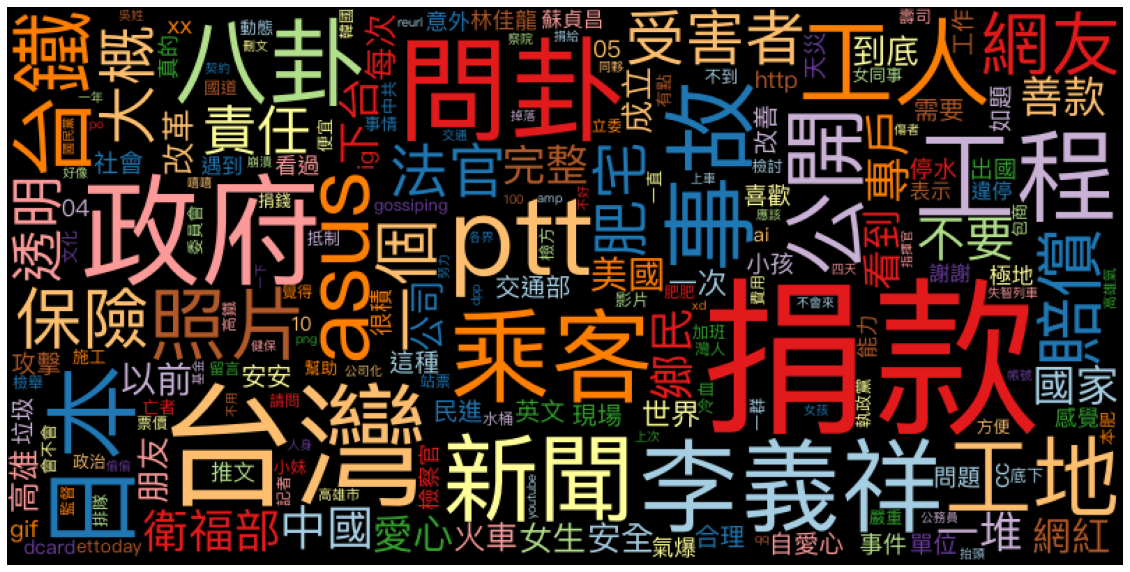

In [266]:
font_path="/System/Library/fonts/PingFang.ttc" # 標楷體

wc = WordCloud(background_color='black',font_path=font_path,height=400,width=800,colormap='Paired')
wc.fit_words(count_tag['index'].to_dict())
import matplotlib.pyplot as plt
plt.figure(figsize=(20,40))
plt.imshow(wc)
plt.axis("off")
plt.show()
